Problem Statement:

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.


Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Loading dataset**

In [2]:
df=pd.read_csv("/content/Black_friday_dataset.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Checking for null values**

In [6]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [7]:
#No need to handle null values while visualizing

In [8]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


We can drop User_ID and Product_ID for model prediction as it has more unique values.

**EDA**

**Correlation between variables**

In [9]:
correlation=df.corr(numeric_only=True)
correlation

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<Axes: >

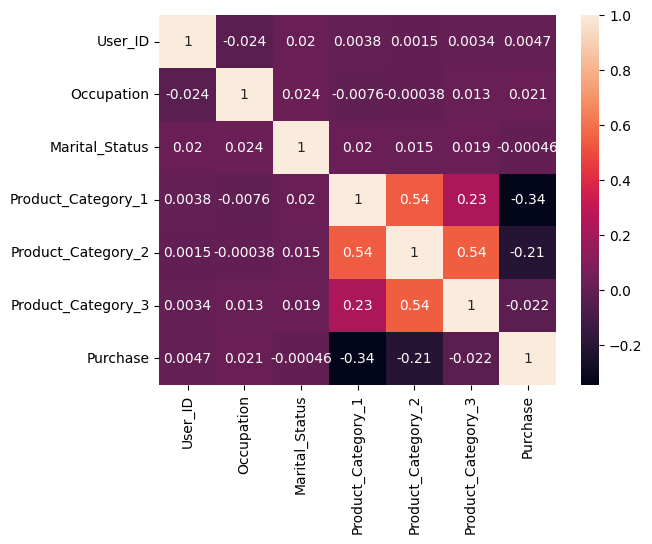

In [10]:
sns.heatmap(correlation,annot=True)

There exists some corellation between the product category groups.

**Find which distribution for Target variable: Purchase**

<ipython-input-11-6a477bed1d10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"],color='r')


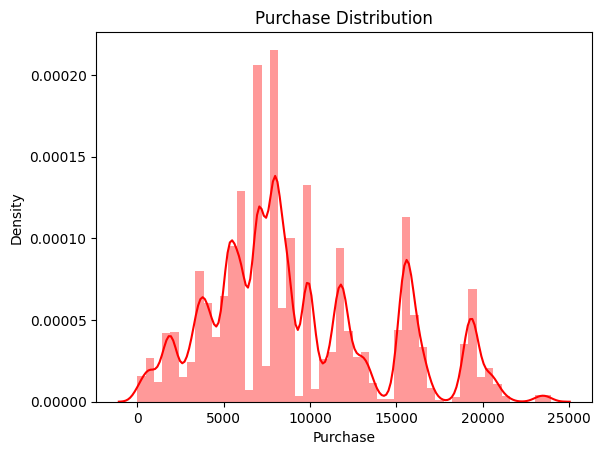

In [11]:
sns.distplot(df["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

The above is a histogram combined with a Kernel Density Estimate (KDE) plot.

* Multiple peaks suggest that the data may be multimodal, meaning there are several distinct clusters of purchase amounts.

* The valleys (low points) in the KDE plot indicate ranges where purchase amounts are less common.

* The distribution is not symmetric; it appears to have several peaks, indicating that the data might be skewed or have multiple modes.

***Check for skewness***

In [12]:
df['Purchase'].skew()

0.6001400037087128

The purchase is right skewed (we can do a log transformation for the purchase)



***Check for Kurtosis***

In [13]:
df['Purchase'].kurtosis()

-0.3383775655851702

***Check for outliers***

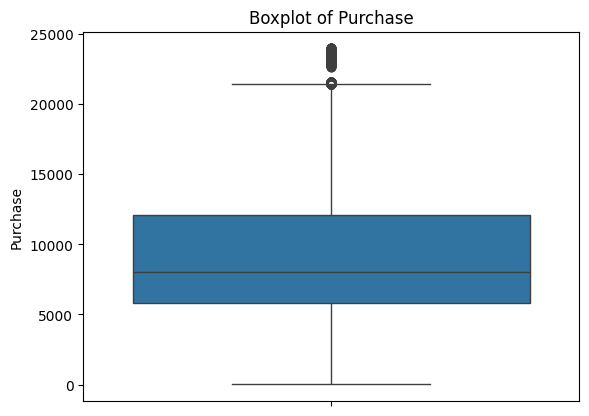

In [14]:
sns.boxplot(df['Purchase'])
plt.title("Boxplot of Purchase")
plt.show()

**VISUALIZATION**

**Gender**

<ipython-input-15-d8d5aba2068b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'],palette='magma')


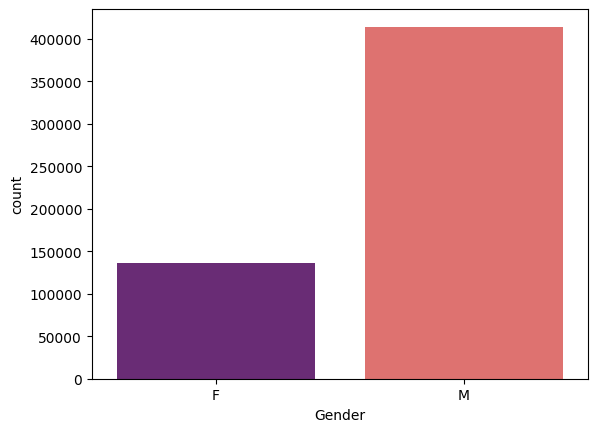

In [15]:
sns.countplot(x=df['Gender'],palette='magma')
plt.show()

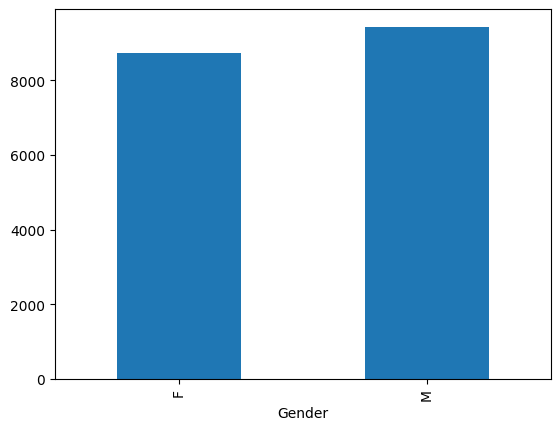

In [16]:
df.groupby("Gender")["Purchase"].mean().plot(kind='bar')
plt.show()

On average the male gender spends more money on purchase contrary to female

**Occupation**

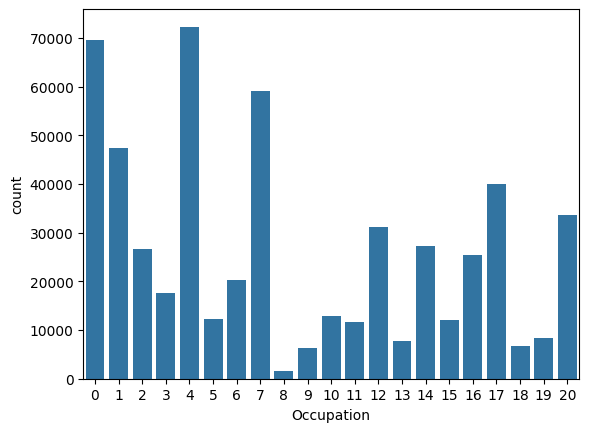

In [17]:
sns.countplot(df,x=df['Occupation'])
plt.show()

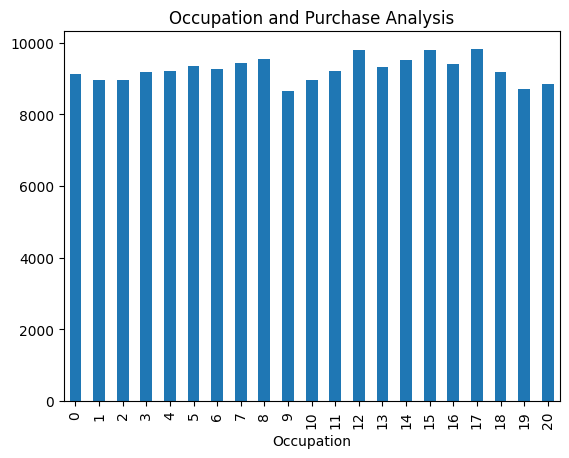

In [18]:
df.groupby("Occupation")['Purchase'].mean().plot(kind='bar')
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average
is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will
have the highest amounts of purchases.

**Marital Status**

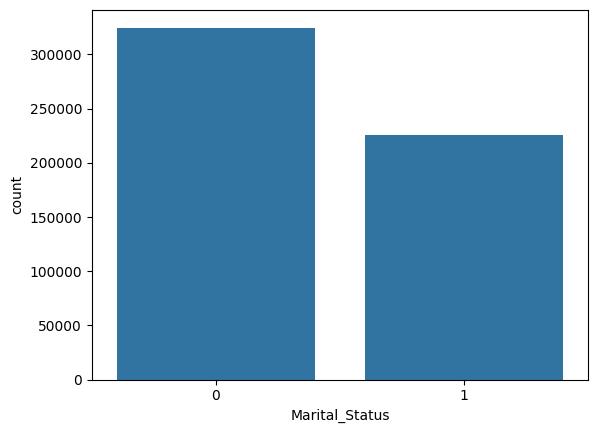

In [19]:
sns.countplot(df,x=df['Marital_Status'])
plt.show()

Unmarried people purchases more

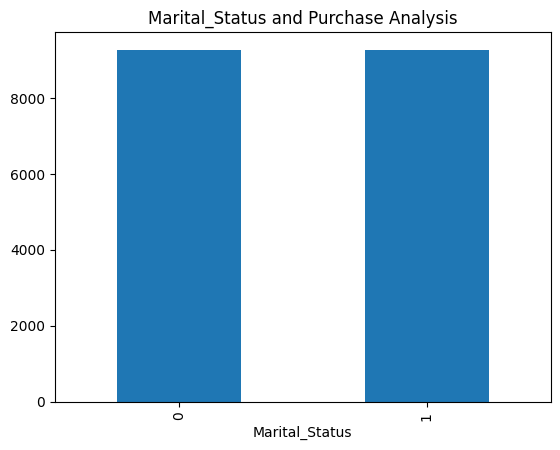

In [20]:
df.groupby("Marital_Status")["Purchase"].mean().plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

 Though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

**City category**

<ipython-input-21-b184979a5a99>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x=df['City_Category'],palette='magma')


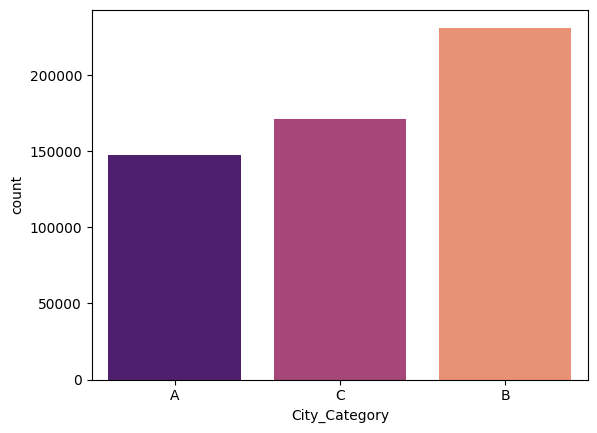

In [21]:
sns.countplot(df,x=df['City_Category'],palette='magma')
plt.show()

It is observed that city category B has made the most number of puchases.

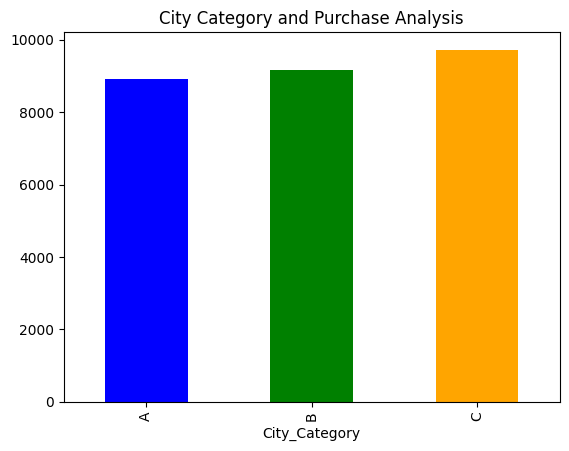

In [22]:
df.groupby("City_Category")['Purchase'].mean().plot(kind='bar',color=['blue', 'green', 'orange'])
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

**Stay_In_Current_City_Years**

<ipython-input-23-6575923198d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x=df['Stay_In_Current_City_Years'],palette='viridis')


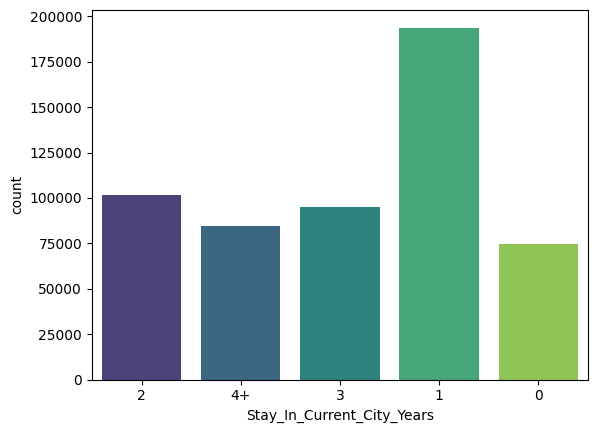

In [23]:
sns.countplot(df,x=df['Stay_In_Current_City_Years'],palette='viridis')
plt.show()

The longest someone is living in that city the less prone they are to buy new things.

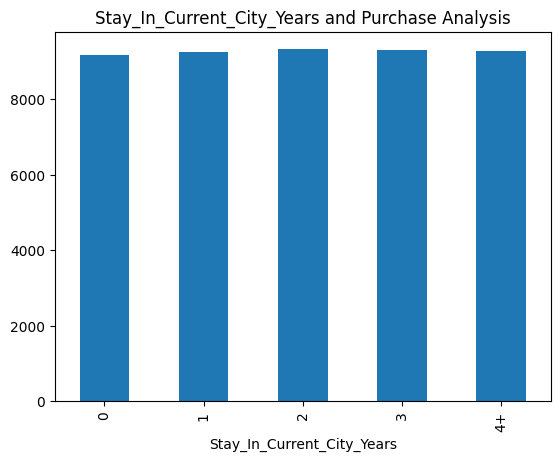

In [24]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

People who are new in city are responsible for the higher number of purchase, however looking at it individually they
tend to spend the same amount independently of how many years the have lived in their current city.

Age

<ipython-input-25-a51421a65e7a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x=df['Age'],palette='viridis')


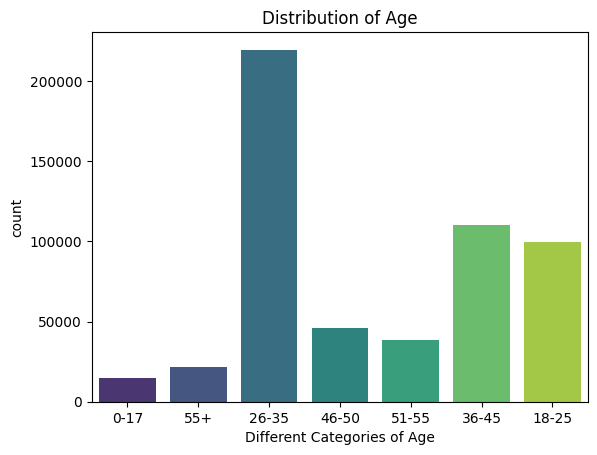

In [25]:
sns.countplot(df,x=df['Age'],palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

<Axes: xlabel='Age'>

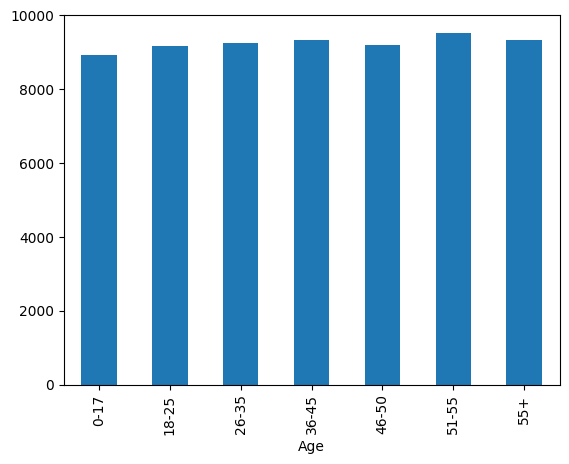

In [26]:
df.groupby("Age")["Purchase"].mean().plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

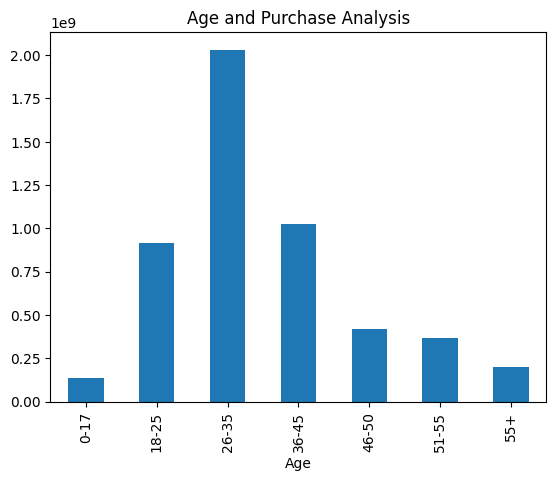

In [27]:
df.groupby("Age")['Purchase'].sum().plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

**Product_Category_1**

<ipython-input-28-c9a2757d2bf3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x=df['Product_Category_1'],palette='magma')


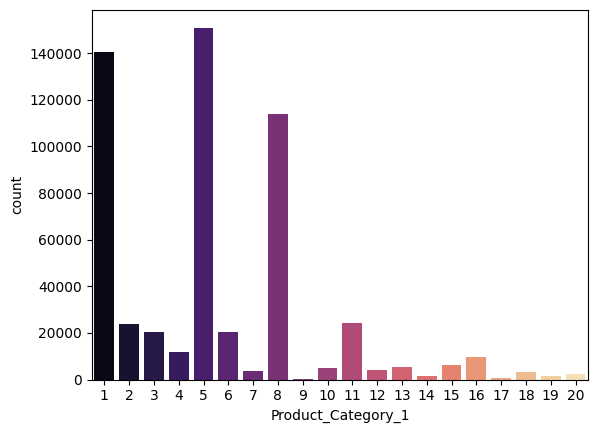

In [28]:
sns.countplot(df,x=df['Product_Category_1'],palette='magma')
plt.show()

Product_Category_1 numbers 1,5 and 8 stand out.

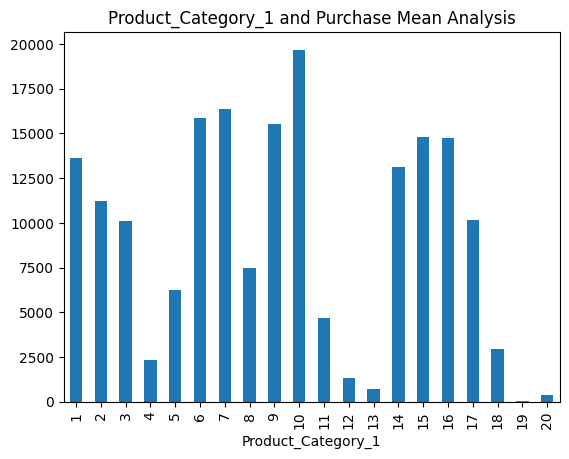

In [29]:
df.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar')
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

Although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest.

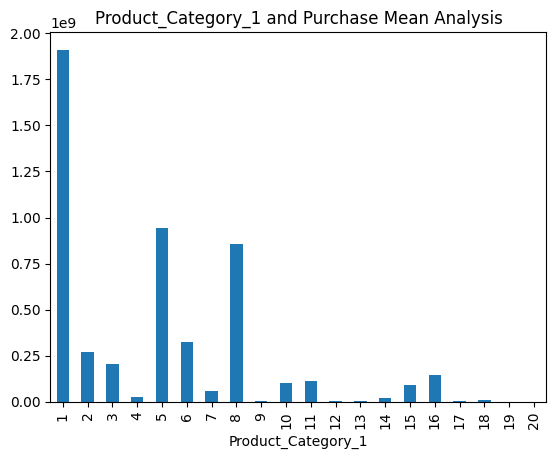

In [30]:
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar')
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

Those three products have the highest sum of sales since their were three most sold products.

**Product_Category_2**

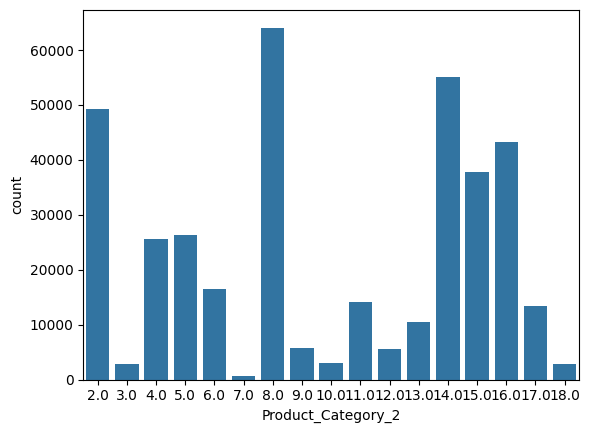

In [31]:
sns.countplot(df,x=df['Product_Category_2'])
plt.show()

**Product_Category_3**

<ipython-input-32-a2c082c893d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x=df['Product_Category_3'],palette='magma')


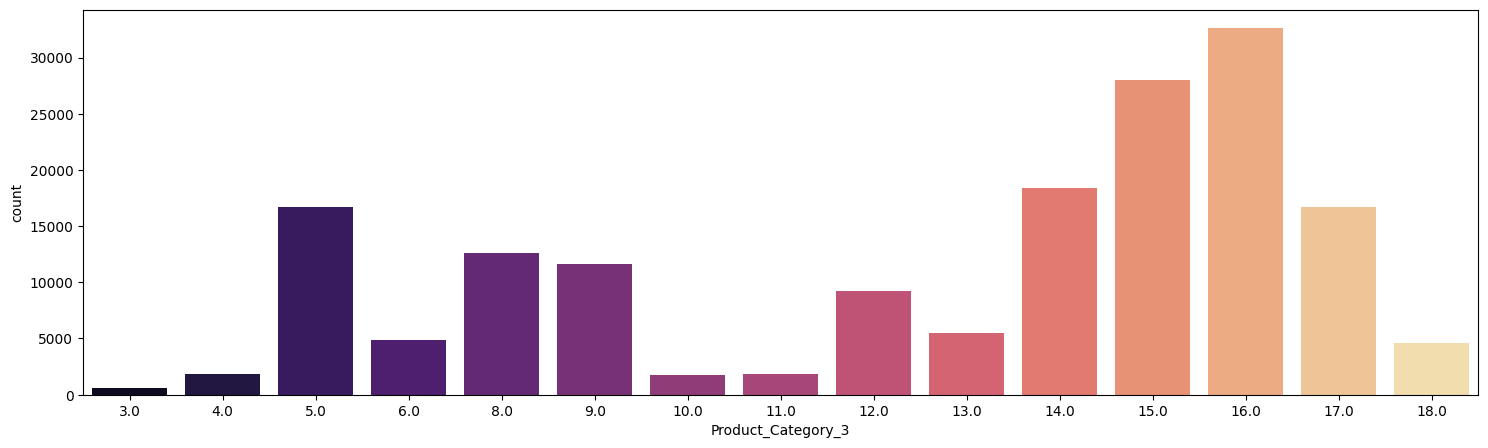

In [32]:
plt.figure(figsize=(18,5))
sns.countplot(df,x=df['Product_Category_3'],palette='magma')
plt.show()

**Encoding Categorical Variables**

In [33]:
df1=df.copy()

In [34]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Dropping irrelevant columns**

In [35]:
df1=df1.drop(['User_ID','Product_ID'],axis=1)

In [36]:
#Dummy Variables:
df1 = pd.get_dummies(df1, columns=['Stay_In_Current_City_Years'])

In [37]:
df1.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,F,0-17,10,A,0,3,NaN,NaN,8370,False,False,True,False,False
1,F,0-17,10,A,0,1,6.0,14.0,15200,False,False,True,False,False
2,F,0-17,10,A,0,12,NaN,NaN,1422,False,False,True,False,False
3,F,0-17,10,A,0,12,14.0,NaN,1057,False,False,True,False,False
4,M,55+,16,C,0,8,NaN,NaN,7969,False,False,False,False,True


In [38]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [39]:
df1['Gender']=lr.fit_transform(df1['Gender'])

In [40]:
df1['Age'] = lr.fit_transform(df1['Age'])

In [41]:
df1['City_Category'] = lr.fit_transform(df1['City_Category'])

In [42]:
df1.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


**Handling missing values**

In [43]:
df1['Product_Category_2']=df1['Product_Category_2'].fillna(0).astype('int64')
df1['Product_Category_3']=df1['Product_Category_3'].fillna(0).astype('int64')

In [44]:
df1.isna().sum()

,0
Gender,0
Age,0
Occupation,0
City_Category,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,0
Stay_In_Current_City_Years_0,0


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int64
 1   Age                            550068 non-null  int64
 2   Occupation                     550068 non-null  int64
 3   City_Category                  550068 non-null  int64
 4   Marital_Status                 550068 non-null  int64
 5   Product_Category_1             550068 non-null  int64
 6   Product_Category_2             550068 non-null  int64
 7   Product_Category_3             550068 non-null  int64
 8   Purchase                       550068 non-null  int64
 9   Stay_In_Current_City_Years_0   550068 non-null  bool 
 10  Stay_In_Current_City_Years_1   550068 non-null  bool 
 11  Stay_In_Current_City_Years_2   550068 non-null  bool 
 12  Stay_In_Current_City_Years_3   550068 non-null  bool 
 13 

Convert to int

In [46]:
df1 = df1.astype(int)

In [47]:
df1

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1,6,16,2,0,8,0,0,7969,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,0,0,368,0,1,0,0,0
550064,0,2,1,2,0,20,0,0,371,0,0,0,1,0
550065,0,2,15,1,1,20,0,0,137,0,0,0,0,1
550066,0,6,1,2,0,20,0,0,365,0,0,1,0,0


**Removing Outliers**

In [48]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['Purchase'].quantile(0.25)
Q3 = df1['Purchase'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df2 = df1[(df1['Purchase'] >= lower_bound) & (df1['Purchase'] <= upper_bound)]

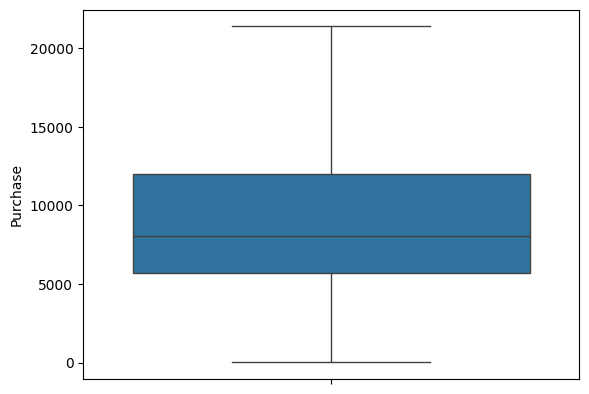

In [49]:
sns.boxplot(df2['Purchase'])
plt.show()

**SPLIT TRAIN AND TEST DATA**

In [50]:
x=df2.drop('Purchase',axis=1)
y=df2['Purchase']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
df2.shape

(547391, 14)

In [53]:
df2.size

7663474

**MODELLING**

**Linear Regression**

In [54]:
print(x_train.shape)
print(y_train.shape)

(383173, 13)
(383173,)


In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
#intercept
lr.intercept_

9742.34318734949

In [59]:
#coefficient
lr.coef_

array([ 463.941993  ,  103.66187034,    4.78032734,  310.37484933,
        -48.19593572, -379.29154683,    1.27653777,  138.22070483,
        -50.34031977,   -4.95490487,   35.58085676,   -8.29379888,
         28.00816676])

In [70]:
lr_y_pred=lr.predict(x_test)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mean_absolute_error(y_test,lr_y_pred)

3441.8393655174796

In [73]:
mean_squared_error(y_test,lr_y_pred)

20278199.711490028

In [74]:
r2_score(y_test,lr_y_pred)

0.16800041008089894

In [75]:
from math import sqrt
print("RMSE of Linear Regression Model :",sqrt(mean_squared_error(y_test,lr_y_pred)))

RMSE of Linear Regression Model : 4503.132211193674


**DecisionTreeRegressor**

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [77]:
dt_y_pred = regressor.predict(x_test)

In [78]:
mean_absolute_error(y_test,dt_y_pred)

2354.5604541432353

In [79]:
mean_squared_error(y_test,dt_y_pred)

11102006.618965754

In [80]:
r2_score(y_test,dt_y_pred)

0.5444928501702809

In [81]:
print("RMSE of Decision Tree Regressor Model: ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Regressor Model:  3331.967379637105


**Random Forest Regressor**

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [83]:
rf_y_pred = rf_regressor.predict(x_test)

In [84]:
mean_absolute_error(y_test,rf_y_pred)

2232.497180807623

In [85]:
mean_squared_error(y_test,rf_y_pred)

9431797.194225365

In [86]:
r2_score(y_test,rf_y_pred)

0.6130203119880892

In [87]:
print("PMSE of Random Forest Regressor Model:",sqrt(mean_squared_error(y_test,rf_y_pred)))

PMSE of Random Forest Regressor Model: 3071.123116097003


**XG Boost Regressor**

In [88]:
from xgboost.sklearn import XGBRegressor
xg_reg = XGBRegressor(learning_rate = 1.0,max_depth = 6,min_chlid_weight = 40,seed = 0)
xg_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:11:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_chlid_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_chlid_weight=40, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [91]:
xg_y_pred = xg_reg.predict(x_test)

In [93]:
mean_absolute_error(y_test,xg_y_pred)

2128.1937221282715

In [94]:
mean_squared_error(y_test,xg_y_pred)

8136959.090089181

In [95]:
r2_score(y_test,xg_y_pred)

0.666146565155549

In [96]:
print("RMSE of XGBoost Regressor Model:",sqrt(mean_squared_error(y_test,xg_y_pred)))

RMSE of XGBoost Regressor Model: 2852.5355545705615


We can see that XGBoost regressor has the minimum Root Mean Squred Error Value (2853) . Therefore XGBoost is the best ML algorithm.